In [1]:
!pip install ultralytics
from ultralytics import YOLO
import os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.5/780.5 kB 3.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [2]:
TEST_DIR = '/content/drive/MyDrive/Colab Notebooks/Object Detector/test/images'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



image 1/7 /content/drive/MyDrive/Colab Notebooks/Object Segmentation_UNet/20240605_Dataset/test/images/1000_F_316527847_WTCZQAyr2uWwHhNzA4zIp6nBuJ8SyRyK.jpg: 448x640 1 head, 1 body, 336.5ms
image 2/7 /content/drive/MyDrive/Colab Notebooks/Object Segmentation_UNet/20240605_Dataset/test/images/1991_458_1.jpg: 640x544 1 head, 2 bodys, 266.1ms
image 3/7 /content/drive/MyDrive/Colab Notebooks/Object Segmentation_UNet/20240605_Dataset/test/images/2006AT4199.jpg: 640x448 1 head, 1 body, 216.1ms
image 4/7 /content/drive/MyDrive/Colab Notebooks/Object Segmentation_UNet/20240605_Dataset/test/images/325.jpg: 640x640 1 head, 1 body, 343.6ms
image 5/7 /content/drive/MyDrive/Colab Notebooks/Object Segmentation_UNet/20240605_Dataset/test/images/360_F_101992625_1iA677A94B2gf0ogZDmo890pYPOM0ONs.jpg: 576x640 1 head, 1 body, 353.0ms
image 6/7 /content/drive/MyDrive/Colab Notebooks/Object Segmentation_UNet/20240605_Dataset/test/images/61kKW8g9j2L._AC_UF350,350_QL80_.jpg: 640x512 1 head, 1 body, 294.7ms
i

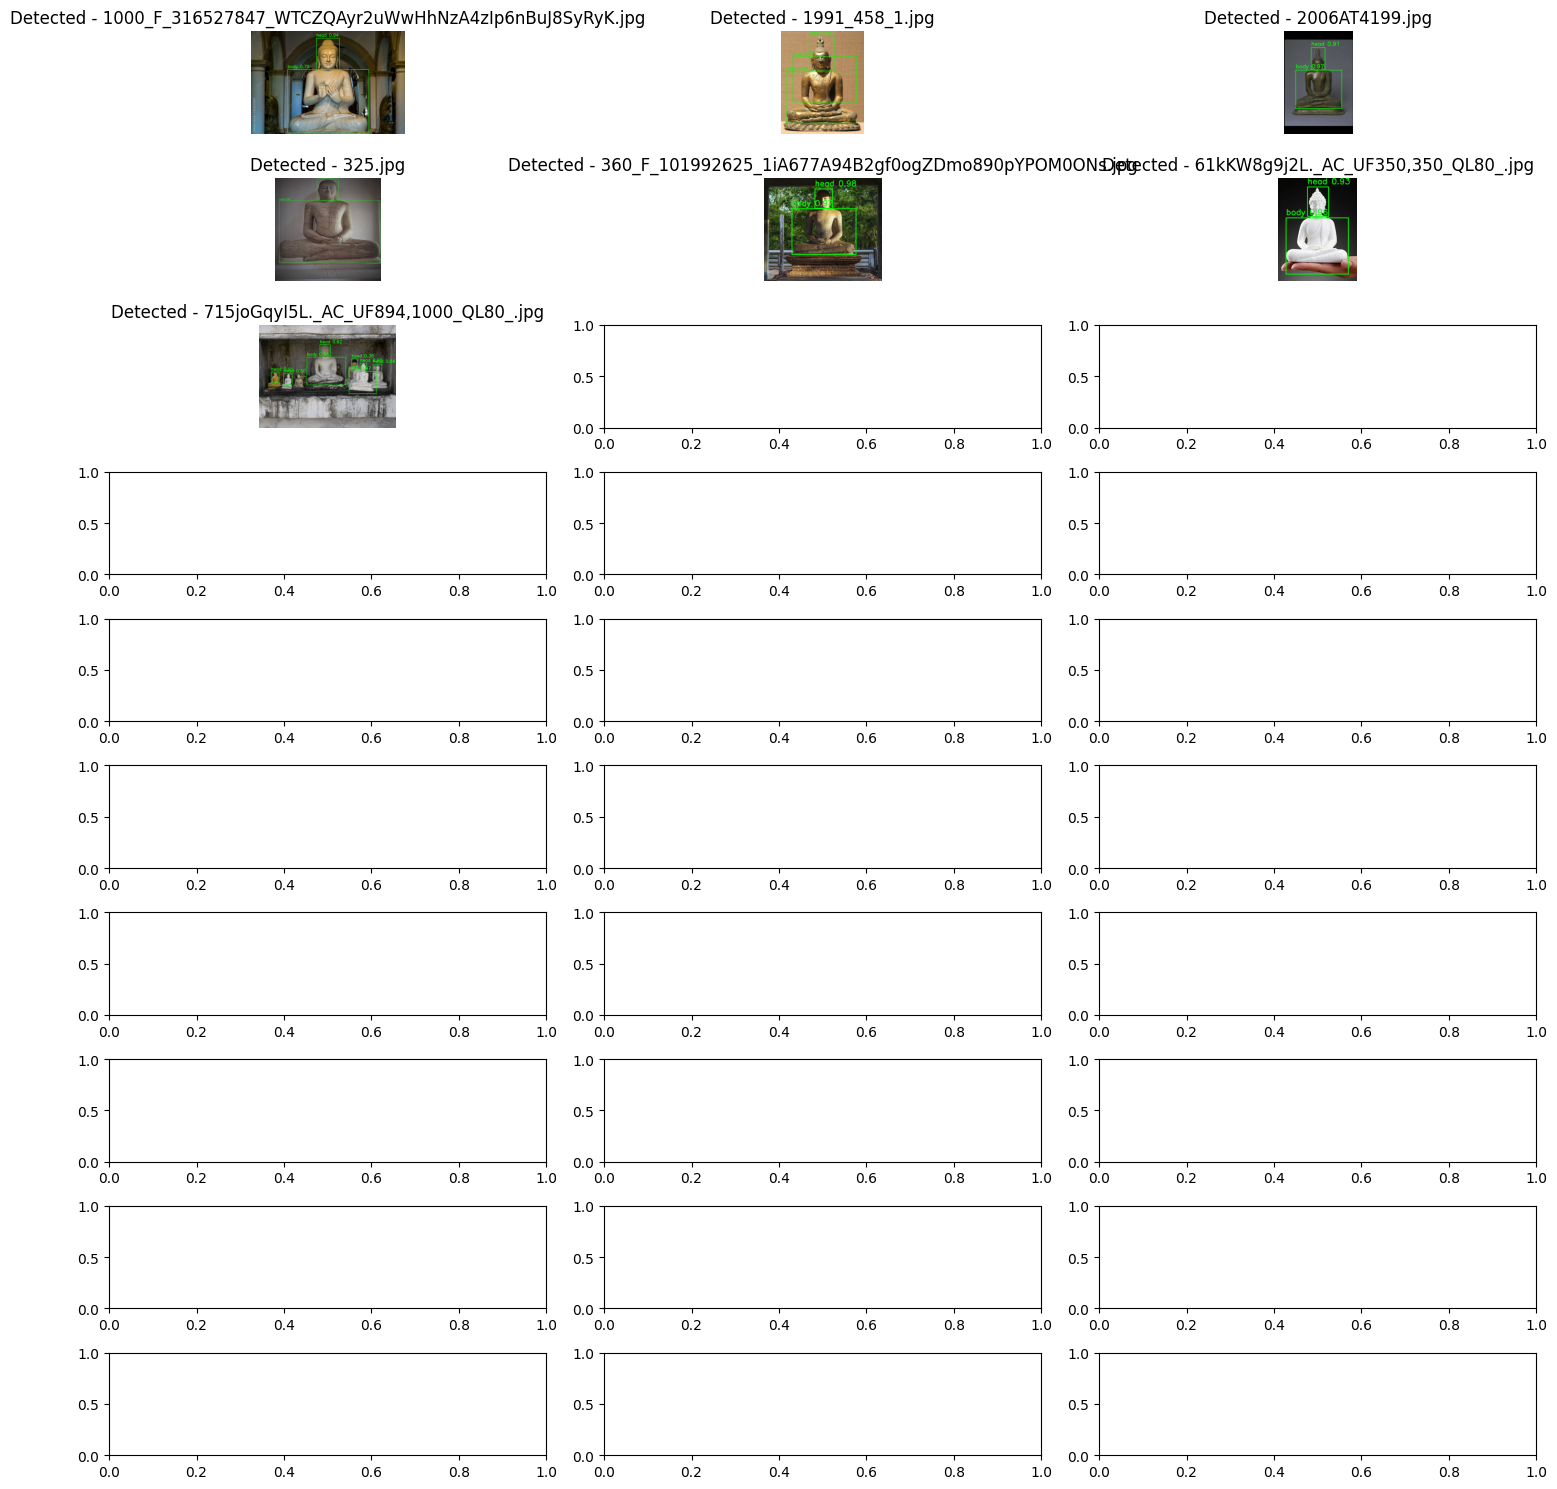

In [4]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os

model = YOLO('/content/drive/MyDrive/Colab Notebooks/Object Detector/runs/detect/train3/weights/best.pt')

output_folder = './detected_outputs/'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

results = model.predict(TEST_DIR, save=False, imgsz=640, conf=0.2)

def draw_boxes(image, boxes, model):
    for box in boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = box.conf[0].item()
        class_id = int(box.cls[0].item())
        label = f'{model.names[class_id]} {conf:.2f}'
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    return image

def visualize_images_grid(images, titles, grid_size=(3, 3)):
    fig, axs = plt.subplots(grid_size[0], grid_size[1], figsize=(15, 15))
    axs = axs.flatten()
    for img, title, ax in zip(images, titles, axs):
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.set_title(title)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

images = []
titles = []
for result in results:
    img = result.orig_img
    image_name = os.path.basename(result.path)
    img_with_boxes = draw_boxes(img.copy(), result.boxes, model)
    output_path = os.path.join(output_folder, image_name)
    cv2.imwrite(output_path, img_with_boxes)
    images.append(img_with_boxes)
    titles.append(f'Detected - {image_name}')

grid_size = (10, 3)
visualize_images_grid(images, titles, grid_size=grid_size)
